In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import preprocessing
from sklearn import tree
import graphviz

# Decision Tree

* Classification Tree
    * Entropy
    * Gini Index
* Build Desicion Tree    
* Tree Pruning    
* Bagging

## Classification Tree

Decision tree can be applied to both classification and regression. We first consider classification problems. Let's start with an example. Say I want to predict whether a person will play tennis or not based on different whether condisions shown below:
![](_pic/tennis.png)

The most simple decision tree can look like this:

```
If Outlook==Rain then 
    Play Tennis==No 
else Outlook==Sunny then 
    If Wind==Weak then 
        Play Tennis==Yes 
    else  
        Play Tennis==No
```

The real decision tree generated using the above table is apparantly not the same as the one just mentioned. The main question for us to solve is how we automatically generate a decision tree using the table above?

To generate a classification tree, we use recursive binary splitting to grow a classification tree. Intuitively, when deciding which feature we should use to make a split, we want the elements in both splits as "clean" as possible, i.e., we want the split to maximize the information gain. Information Gain is defined as follows


$$\text{Information Gain} = I(D_{parent}) - p_{left}I(D_{left})- p_{right}I(D_{right})$$
```
where 
* I(): the impurity of certain node
* p_{left}: the propotion of the number of the observations that is in classified in left node.
```

The process of recursive binary splitting is as follows:
1. starts with root node
2. choose a split based on the highest information gain
3. for each splited node, do step 2, until the observation in the splitted node is below a certain predefined number or information gain below 0.

There are two common ways to measure impurity. They are **Entropy** and **Gini index**

**Entropy**

Entropy is defined as $I_{entropy}= \sum_{k=1}^{K} -p_{k}log_2(p_{k})$
where
* K: the number of unique class labels, in this case, Yes and No
* p_k: the proportion of k in the particular node.

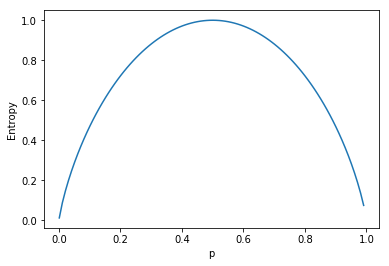

In [2]:
def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2(1 - p)

def plot_entropy():
    x = np.arange(0.001, 1.0, 0.01)
    ent = [entropy(p) for p in x]
    plt.plot(x, ent)
    plt.xlabel('p')
    plt.ylabel('Entropy')
    plt.show()

plot_entropy()

From the above plot, we can see that the more "impure" the node is, i.e., p is around 0.5 if the unique class label equals 2, the higher the entropy will be. If the entropy is high after the split, then the information gain will be low, which means using this particular feature to make a split is not ideal, since the information gain doesn't increase a lot.

**Gini Index**

Gini Index is defined as $I_{entropy}= \sum_{k=1}^{K} p_{k}(1 - p_{k})$
where
* K: the number of unique class labels, in this case, Yes and No
* p_k: the proportion of k in the particular node.

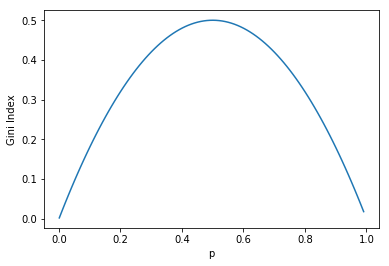

In [3]:
def gini(p):
    return  p * (1-p) + (1 - p) * (p)

def plot_gini():
    x = np.arange(0.001, 1.0, 0.01)
    ent = [gini(p) for p in x]
    plt.plot(x, ent)
    plt.xlabel('p')
    plt.ylabel('Gini Index')
    plt.show()

plot_gini()

We can see that the shape of the gini index plot is actually the same as that of Entropy. Hence, both can be used to measure impurity.

**Calculate using example**

In order to find the first split from the root node, the information gain for each feature is shown in the picture below
![](_pic/information_gain_root2.png)

Therefore, among all the features, we should choose *Outlook* as the feature to split. The process should be follow by the process described above, that is, after we splot by *Outlook*, we should then use the rest of teh feature to decide which feature will give us the highest information gain for the splitted nodes from *Outlook*.

## Build decision tree using Sklearn

In [4]:
def create_tennis():
    tennis = pd.DataFrame({'Outlook':pd.Categorical(['Sunny','Sunny','Overcast','Rain','Rain','Rain','Overcast','Sunny','Sunny','Rain','Sunny','Overcast','Overcast','Rain']),
                           'Temp': pd.Categorical(['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cold','Mild','Mild','Mild','Hot','Mild']),
                           'Play Tennis': pd.Categorical(['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No'])
                          })
    le = preprocessing.LabelEncoder()
    le.fit(["Sunny", "Overcast", "Rain"])
    tennis.Outlook = le.transform(tennis.Outlook) 
    le.fit(["Hot", "Mild", "Cool","Cold"])
    tennis.Temp = le.transform(tennis.Temp) 
    
    return tennis

In [5]:
tennis = create_tennis()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(tennis[['Outlook','Temp']], tennis[['Play Tennis']])

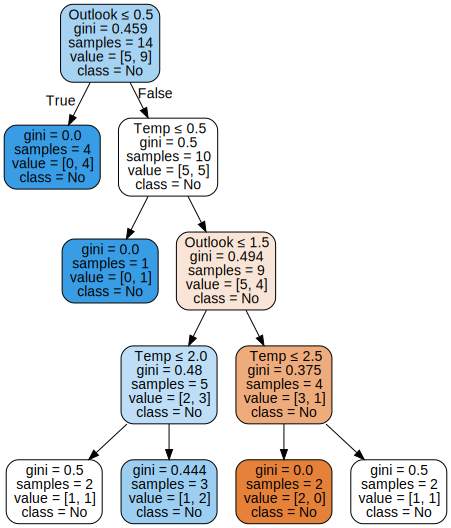

In [6]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=tennis[['Outlook','Temp']].columns,  
                         class_names=tennis['Play Tennis'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [7]:
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

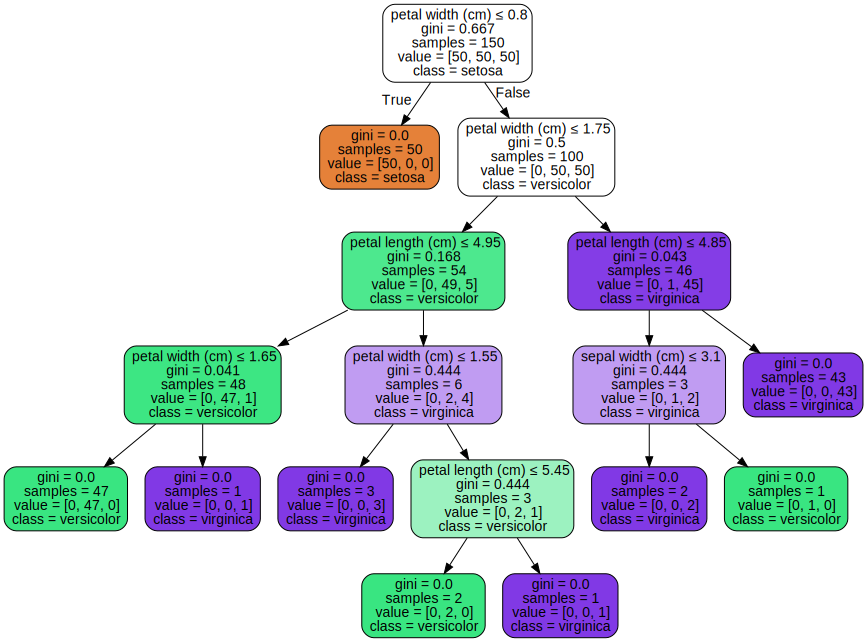

In [8]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

## Tree Pruning

The process described above may produce good predictions on the training set, but it is likely to overfit the data, leading to a high error rate in testing set. A way to solve this problem is by the following process:

**Step 1** 
Build a large tree using all the features

**Step 2** 
Prun it back to obtain a *subtree*. Given a *subtree*, we can estimate its test error using cross-validation. We obtain our *subtree* not by using all the possible *subtrees* we can get from the original tree, but by using cost complexity pruning. Similar to Lasso regression, it adds a L1 norm of the number of trees to the original cost function. Hence, by adjusting the $\alpha$, the larger the $\alpha$ is, the smaller our *subtree* is.

**Step 3** 
We pick the $\alpha$ that give us the smallest test error calculating using cross-validation to be our final $\alpha$. The final tree is the subtree generated by this $\alpha$.

Since single tree are often suffer from high variance, in later post, we are going to discuss techniques that can help us to solve this problem.

**Reference**
* [Sklearn Classification Tree](http://scikit-learn.org/stable/modules/tree.html#tree-classification)
* [Decision Tree from Ethen](https://github.com/ethen8181/machine-learning/blob/master/trees/decision_tree.ipynb)
* [Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/)